### Data Cleaning

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy import arange

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from scipy import stats
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

####Load Dataset

In [2]:
url = 'https://raw.githubusercontent.com/k4ilham/Tugas-Paper-Kelompok-3---Software-Engineering/main/dataset_codacy.csv'
df = pd.read_csv(url, encoding='latin1')

In [3]:
df.shape

(30, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Project Name  30 non-null     object 
 1   Grade         30 non-null     object 
 2   Issues        30 non-null     object 
 3   Complexicy    30 non-null     object 
 4   Duplication   30 non-null     object 
 5   Branch        29 non-null     float64
 6   Java          4 non-null      float64
 7   Swift         1 non-null      float64
 8   Json          2 non-null      float64
 9   Kotlin        1 non-null      float64
 10  Python        26 non-null     float64
 11  C             7 non-null      float64
 12  CPP           9 non-null      float64
 13  CSS           9 non-null      float64
 14  Markdown      29 non-null     float64
 15  Javascript    8 non-null      float64
 16  Shell         15 non-null     float64
 17  Dockerfile    8 non-null      float64
 18  Minor         30 non-null     in

In [5]:
####Show top 5 Data

In [6]:
df.head(5)

,Project Name,Grade,Issues,Complexicy,Duplication,Branch,Java,Swift,Json,Kotlin,...,Javascript,Shell,Dockerfile,Minor,Medium,Critical,Code Style,Security,Error Prnoe,Performance
0,pytorch / vision,A,7%,3%,31%,1.0,67.0,NaN,NaN,NaN,...,NaN,33.0,NaN,882,506,50.0,1324,108.0,1.0,5.0
1,opencv,A,4%,0%,28%,1.0,1570.0,596.0,NaN,NaN,...,48.0,32.0,1.0,11843,1941,608.0,12625,550.0,907.0,233.0
2,mmcv,A,6%,2%,32%,1.0,NaN,NaN,2.0,NaN,...,NaN,NaN,9.0,349,68,29.0,384,16.0,16.0,30.0
3,AliceVision,A,4%,0%,35%,1.0,NaN,NaN,NaN,NaN,...,NaN,30.0,NaN,832,638,15.0,1372,54.0,37.0,22.0
4,computervision-recipes,B,67%,1%,16%,1.0,NaN,NaN,NaN,NaN,...,87.0,5.0,9.0,2390,1292,87.0,3656,83.0,30.0,NaN


#### Remove Collumn

In [7]:
# Menghapus fitur "Project Name" dan "Grade" dari DataFrame
df.drop(['Project Name', 'Grade'], axis=1, inplace=True)

#### Rename Null Value to 0

In [8]:
df.fillna(0, inplace=True)

#### Covert % to Numeric

In [9]:
# Menghapus karakter '%' dari kolom-kolom
df['Issues'] = df['Issues'].str.rstrip('%')
df['Complexicy'] = df['Complexicy'].str.rstrip('%')
df['Duplication'] = df['Duplication'].str.rstrip('%')

# Mengubah ke tipe data numerik
df['Issues'] = pd.to_numeric(df['Issues'])
df['Complexicy'] = pd.to_numeric(df['Complexicy'])
df['Duplication'] = pd.to_numeric(df['Duplication'])


In [10]:
df.head(5)

,Issues,Complexicy,Duplication,Branch,Java,Swift,Json,Kotlin,Python,C,...,Javascript,Shell,Dockerfile,Minor,Medium,Critical,Code Style,Security,Error Prnoe,Performance
0,7,3,31,1.0,67.0,0.0,0.0,0.0,1161.0,2.0,...,0.0,33.0,0.0,882,506,50.0,1324,108.0,1.0,5.0
1,4,0,28,1.0,1570.0,596.0,0.0,0.0,5088.0,945.0,...,48.0,32.0,1.0,11843,1941,608.0,12625,550.0,907.0,233.0
2,6,2,32,1.0,0.0,0.0,2.0,0.0,192.0,0.0,...,0.0,0.0,9.0,349,68,29.0,384,16.0,16.0,30.0
3,4,0,35,1.0,0.0,0.0,0.0,0.0,8.0,50.0,...,0.0,30.0,0.0,832,638,15.0,1372,54.0,37.0,22.0
4,67,1,16,1.0,0.0,0.0,0.0,0.0,3318.0,0.0,...,87.0,5.0,9.0,2390,1292,87.0,3656,83.0,30.0,0.0


In [11]:
#### Identify Columns That Null Value and Remove Null Value

In [12]:
# Check for null values in the entire dataset
null_counts = df.isnull().sum()

# Display columns with null values and their counts
print("Columns with null values:")
print(null_counts[null_counts > 0])

if len(null_counts[null_counts > 0]) != 0 :
  # Remove rows with any null values
  df = df.dropna()

Columns with null values:
Series([], dtype: int64)


In [13]:
df.groupby('Code Style').describe()

Issues                                                        \
            count   mean       std    min     25%    50%     75%    max   
Code Style                                                                
99            1.0   26.0       NaN   26.0   26.00   26.0   26.00   26.0   
119           1.0    9.0       NaN    9.0    9.00    9.0    9.00    9.0   
141           1.0    5.0       NaN    5.0    5.00    5.0    5.00    5.0   
163           2.0    3.5  0.707107    3.0    3.25    3.5    3.75    4.0   
168           1.0  103.0       NaN  103.0  103.00  103.0  103.00  103.0   
327           1.0    2.0       NaN    2.0    2.00    2.0    2.00    2.0   
379           1.0   42.0       NaN   42.0   42.00   42.0   42.00   42.0   
384           1.0    6.0       NaN    6.0    6.00    6.0    6.00    6.0   
402           1.0    6.0       NaN    6.0    6.00    6.0    6.00    6.0   
614           1.0   49.0       NaN   49.0   49.00   49.0   49.00   49.0   
619           1.0  241.0       NaN  241.0  241.00  241.0  241.00  241.0   
623           2.0    4.0  1.414214    3.0    3.50    4.0    4.50    5.0   
654           1.0   68.0       NaN   68.0   68.00   68.0   68.00   68.0   
857           1.0   39.0       NaN   39.0   39.00   39.0   39.00   39.0   
919           1.0    8.0       NaN    8.0    8.00    8.0    8.00    8.0   
1066          1.0   11.0       NaN   11.0   11.00   11.0   11.00   11.0   
1081          1.0   12.0       NaN   12.0   12.00   12.0   12.00   12.0   
1162          1.0   37.0       NaN   37.0   37.00   37.0   37.00   37.0   
1238          1.0    5.0       NaN    5.0    5.00    5.0    5.00    5.0   
1324          1.0    7.0       NaN    7.0    7.00    7.0    7.00    7.0   
1372          1.0    4.0       NaN    4.0    4.00    4.0    4.00    4.0   
1729          1.0   10.0       NaN   10.0   10.00   10.0   10.00   10.0   
3656          1.0   67.0       NaN   67.0   67.00   67.0   67.00   67.0   
3804          1.0    4.0       NaN    4.0    4.00    4.0    4.00    4.0   
4945          1.0    9.0       NaN    9.0    9.00    9.0    9.00    9.0   
8322          1.0   17.0       NaN   17.0   17.00   17.0   17.00   17.0   
12625         1.0    4.0       NaN    4.0    4.00    4.0    4.00    4.0   
72924         1.0   37.0       NaN   37.0   37.00   37.0   37.00   37.0   

           Complexicy       ... Error Prnoe        Performance         \
                count mean  ...         75%    max       count   mean   
Code Style                  ...                                         
99                1.0  0.0  ...        0.00    0.0         1.0    0.0   
119               1.0  1.0  ...        0.00    0.0         1.0    0.0   
141               1.0  1.0  ...        2.00    2.0         1.0    0.0   
163               2.0  1.5  ...        4.25    5.0         2.0    1.0   
168               1.0  0.0  ...        0.00    0.0         1.0    0.0   
327               1.0  0.0  ...        6.00    6.0         1.0    1.0   
379               1.0  0.0  ...        4.00    4.0         1.0    0.0   
384               1.0  2.0  ...       16.00   16.0         1.0   30.0   
402               1.0  1.0  ...        0.00    0.0         1.0    0.0   
614               1.0  0.0  ...        0.00    0.0         1.0    0.0   
619               1.0  0.0  ...       94.00   94.0         1.0    0.0   
623               2.0  0.5  ...       75.75  101.0         2.0   36.5   
654               1.0  4.0  ...       11.00   11.0         1.0    0.0   
857               1.0  8.0  ...        0.00    0.0         1.0    0.0   
919               1.0  0.0  ...       20.00   20.0         1.0   10.0   
1066              1.0  1.0  ...        7.00    7.0         1.0    0.0   
1081              1.0  0.0  ...        2.00    2.0         1.0    0.0   
1162              1.0  7.0  ...        0.00    0.0         1.0    0.0   
1238              1.0  0.0  ...      105.00  105.0         1.0    2.0   
1324              1.0  3.0  ...        1.00    1.0         1.0    5.0   
1372  

In [14]:
df.nunique()

Issues         21
Complexicy      8
Duplication    25
Branch          2
Java            5
Swift           2
Json            3
Kotlin          2
Python         27
C               8
CPP            10
CSS            10
Markdown       30
Javascript      9
Shell          14
Dockerfile      8
Minor          30
Medium         30
Critical       20
Code Style     28
Security       26
Error Prnoe    17
Performance     9
dtype: int64

 #### Delete Columns That Contain a Single Value

In [15]:
df.nunique()

Issues         21
Complexicy      8
Duplication    25
Branch          2
Java            5
Swift           2
Json            3
Kotlin          2
Python         27
C               8
CPP            10
CSS            10
Markdown       30
Javascript      9
Shell          14
Dockerfile      8
Minor          30
Medium         30
Critical       20
Code Style     28
Security       26
Error Prnoe    17
Performance     9
dtype: int64

 #### Identify Columns That Contain a Single Value

In [16]:
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(df.columns[to_del])
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(30, 23)
Index([], dtype='object')
(30, 23)


#### Identify Rows That Contain Duplicate Data and Delete Rows

In [17]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])
if dups.any() == True:
  df.drop_duplicates(inplace=True)
  print(df.shape)

False
Empty DataFrame
Columns: [Issues, Complexicy, Duplication, Branch, Java, Swift, Json, Kotlin, Python, C, CPP, CSS, Markdown, Javascript, Shell, Dockerfile, Minor, Medium, Critical, Code Style, Security, Error Prnoe, Performance]
Index: []

[0 rows x 23 columns]


#### Move Code Style To END Data Frame

In [18]:
# Pindahkan kolom "Code Style" ke paling akhir
code_style_column = df.pop('Code Style')
df['Code Style'] = code_style_column

# Dapatkan nilai dari DataFrame
dataset = df.values

# Mengambil kolom "Code Style" (yang sekarang berada di posisi terakhir) sebagai fitur utama
X = dataset[:, -1].reshape(-1, 1)  # Menggunakan reshape untuk memastikan array memiliki bentuk yang benar


#### Make Target Code Style Rank

In [19]:
boundaries = [0, 100, 1000, 5000, 1000000]
labels = ['A', 'B', 'C', 'D']

# Buat kolom baru untuk menyimpan peringkat
df['Code Style Rank'] = pd.cut(df['Code Style'], bins=boundaries, labels=labels, right=False)

# Ubah tipe data kolom 'Code Style Rank' menjadi kategori
df['Code Style Rank'] = df['Code Style Rank'].astype('category')

In [20]:
df.head(50)

,Issues,Complexicy,Duplication,Branch,Java,Swift,Json,Kotlin,Python,C,...,Shell,Dockerfile,Minor,Medium,Critical,Security,Error Prnoe,Performance,Code Style,Code Style Rank
0,7,3,31,1.0,67.0,0.0,0.0,0.0,1161.0,2.0,...,33.0,0.0,882,506,50.0,108.0,1.0,5.0,1324,C
1,4,0,28,1.0,1570.0,596.0,0.0,0.0,5088.0,945.0,...,32.0,1.0,11843,1941,608.0,550.0,907.0,233.0,12625,D
2,6,2,32,1.0,0.0,0.0,2.0,0.0,192.0,0.0,...,0.0,9.0,349,68,29.0,16.0,16.0,30.0,384,B
3,4,0,35,1.0,0.0,0.0,0.0,0.0,8.0,50.0,...,30.0,0.0,832,638,15.0,54.0,37.0,22.0,1372,C
4,67,1,16,1.0,0.0,0.0,0.0,0.0,3318.0,0.0,...,5.0,9.0,2390,1292,87.0,83.0,30.0,0.0,3656,C
5,5,0,51,1.0,0.0,0.0,0.0,0.0,132.0,195.0,...,8.0,0.0,979,434,15.0,83.0,105.0,2.0,1238,C
6,68,4,22,1.0,0.0,0.0,0.0,0.0,304.0,0.0,...,13.0,0.0,427,229,12.0,5.0,11.0,0.0,654,B
7,11,1,40,1.0,0.0,0.0,1.0,0.0,877.0,0.0,...,11.0,10.0,895,176,8.0,6.0,7.0,0.0,1066,C
8,9,1,12,1.0,0.0,0.0,0.0,0.0,41.0,0.0,...,0.0,0.0,93,25,1.0,2.0,0.0,0.0,119,B
9,241,0,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,632,403,93.0,415.0,94.0,0.0,619,B


####Consider Columns That Have Very Few Values

In [21]:
# summarize the number of unique values in each column
for i in range(df.shape[1]):
  num = len(df.iloc[:, i].unique())
  percentage = float(num) / df.shape[0] * 100
  if percentage < 1:
    print('%d, %d, %.1f%%' % (i, num, percentage))

In [22]:
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(df.columns[to_del])
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(30, 24)
Index([], dtype='object')
(30, 24)


### Plot Histogram

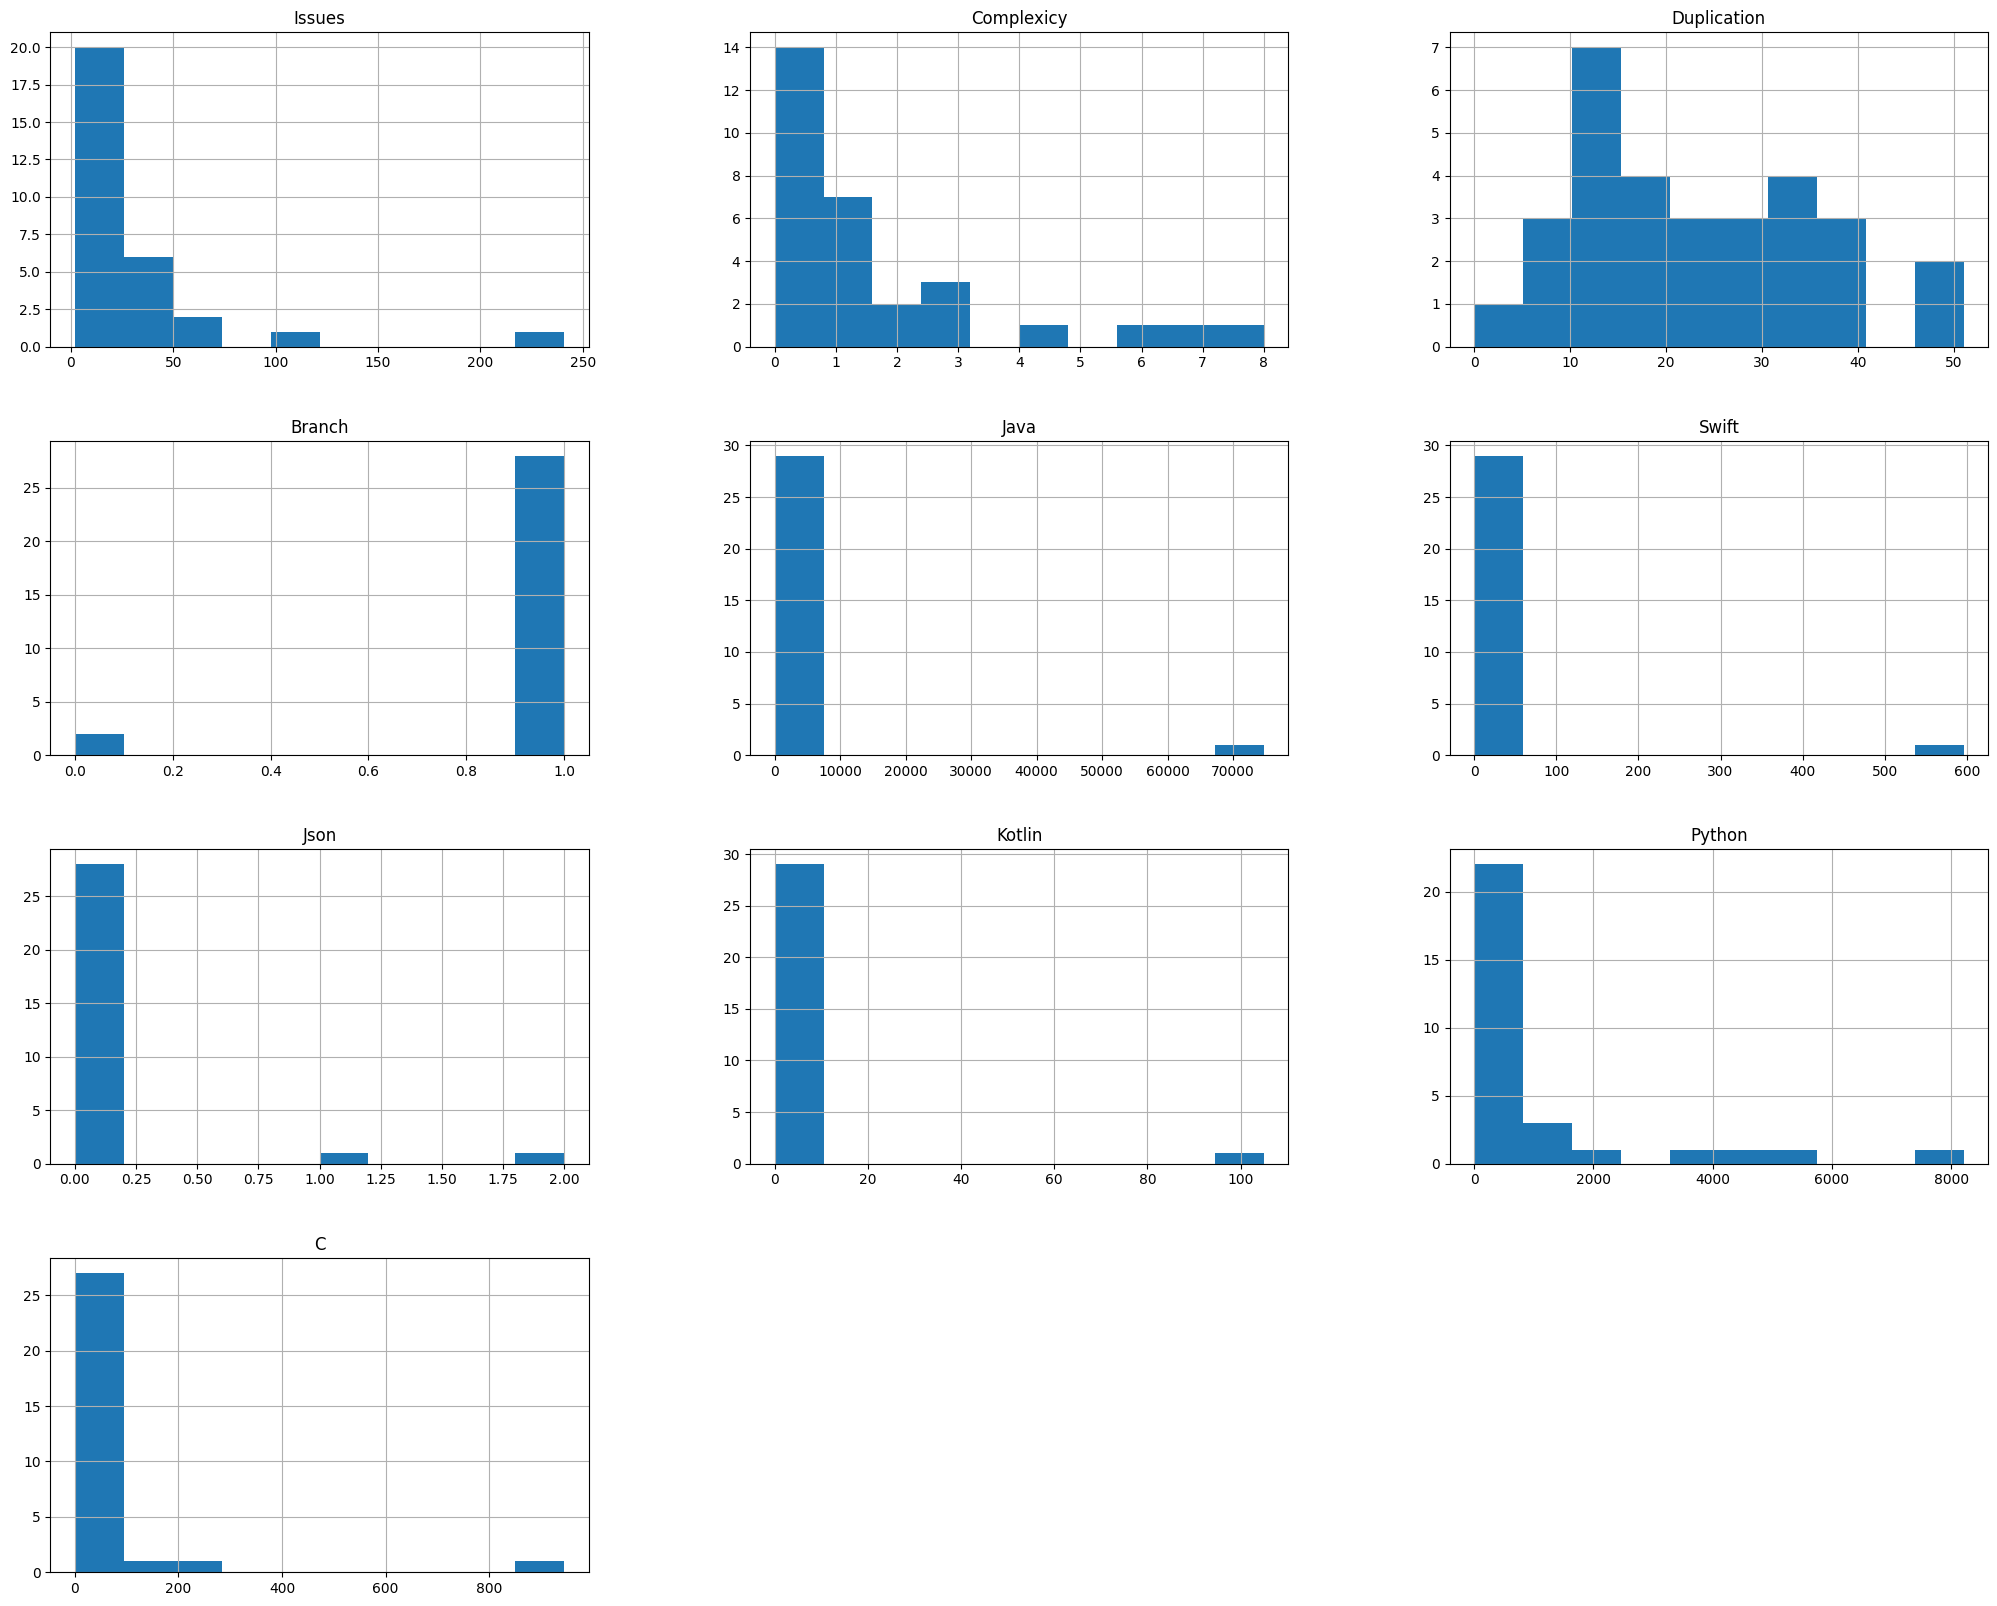

In [23]:
selected_columns = df.iloc[:, :10]

# selected_columns = df_dw.iloc[:, :-2]
selected_columns.hist(bins=10, linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(25,20)
plt.show()

### Splitting The Data into Training And Testing Dataset

In [24]:
# retrieve numpy array
dataset = df.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

# Normalisasi
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

###Feature Selection

In [25]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
k_best = 10  # Choose the number of top features to select

#### ANOVA F-test Features

Number of selected features ANOVA: 10
Selected features ANOVA : ['Java', 'Swift', 'Python', 'C', 'CPP', 'Minor', 'Critical', 'Security', 'Error Prnoe', 'Code Style']


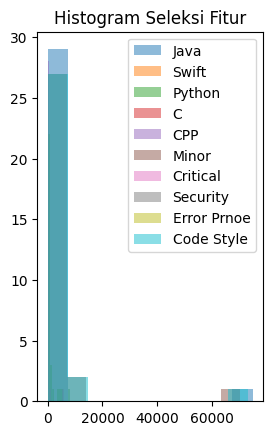

In [26]:
# Create SelectKBest object using chi2 as the score function
best_features_anova = SelectKBest(score_func=f_classif, k=k_best).fit(X_train, y_train)
selected_features_indices = best_features_anova.get_support(indices=True)

# Get the selected column names
selected_column_names = [df.columns[i] for i in selected_features_indices]

print(f"Number of selected features ANOVA: {len(selected_column_names)}")
print(f"Selected features ANOVA : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [27]:
X_train_selected_anova = best_features_anova.transform(X_train)
X_test_selected_anova = best_features_anova.transform(X_test)

In [28]:
# Display the shape of the dataset before and after feature selection
print("Shape of original dataset:", X_train.shape)
print("Shape after feature selection:", X_train_selected_anova.shape)

Shape of original dataset: (24, 23)
Shape after feature selection: (24, 10)


In [29]:
df.columns

Index(['Issues', 'Complexicy', 'Duplication', 'Branch', 'Java', 'Swift',
       'Json', 'Kotlin', 'Python', 'C', 'CPP', 'CSS', 'Markdown', 'Javascript',
       'Shell', 'Dockerfile', 'Minor', 'Medium', 'Critical', 'Security',
       'Error Prnoe', 'Performance', 'Code Style', 'Code Style Rank'],
      dtype='object')

#### Univariate Selection

Number of selected features univariate: 10
Selected features univariate : ['Swift', 'Python', 'C', 'CPP', 'Markdown', 'Minor', 'Medium', 'Critical', 'Error Prnoe', 'Performance']


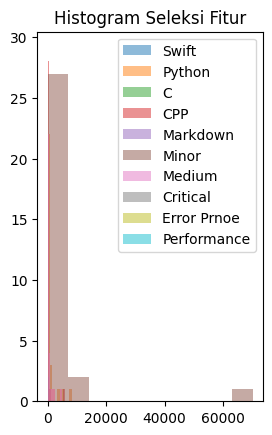

In [30]:
# Create SelectKBest object using chi2 as the score function
best_features_univariate = SelectKBest(score_func=chi2, k=k_best).fit(X_train, y_train)
selected_features_indices = best_features_univariate.get_support(indices=True)

# Get the selected column names
selected_column_names = [df.columns[i] for i in selected_features_indices]

print(f"Number of selected features univariate: {len(selected_column_names)}")
print(f"Selected features univariate : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [31]:
X_train_selected_univariate = best_features_univariate.transform(X_train)
X_test_selected_univariate = best_features_univariate.transform(X_test)

#### Recursive Feature Elimination

Number of selected features RFE: 10
Selected features RFE : ['Duplication', 'Branch', 'Python', 'CPP', 'Markdown', 'Shell', 'Minor', 'Critical', 'Security', 'Code Style']


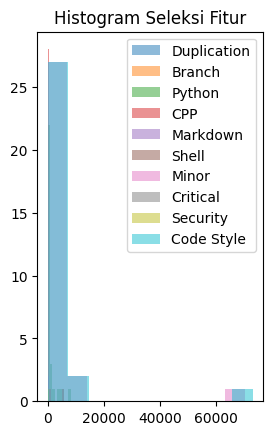

In [32]:
# Inisialisasi RFE dengan model dan jumlah fitur yang diinginkan
best_features_rfe = RFE(RandomForestClassifier(n_estimators=5, random_state=42), n_features_to_select=k_best, step=50)  # Sesuaikan parameter
best_features_rfe.fit(X_train, y_train)
selected_features_indices = best_features_rfe.get_support(indices=True)

# Get the selected column names
selected_column_names = [df.columns[i] for i in selected_features_indices]

print(f"Number of selected features RFE: {len(selected_column_names)}")
print(f"Selected features RFE : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [33]:
X_train_selected_rfe = best_features_rfe.transform(X_train)
X_test_selected_rfe = best_features_rfe.transform(X_test)

### Dimensionality Reduction

In [34]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Principal Component Analysis - PCA

In [35]:
# Dimensionality Reduction with PCA for all feature
print("Dimensionality Reduction with PCA for all feature")
n_components = 5
pca = PCA(n_components=n_components)
X_train_reduced_pca = pca.fit_transform(X_train)
X_test_reduced_pca = pca.transform(X_test)

Dimensionality Reduction with PCA for all feature


#### Linear Discriminant Analysis - LDA

In [36]:
# Dimensionality Reduction with LDA for all feature
print("Dimensionality Reduction with LDA for all feature")
n_components = 1
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_reduced_lda = lda.fit_transform(X_train, y_train)
X_test_reduced_lda = lda.transform(X_test)

Dimensionality Reduction with LDA for all feature


### Uji metode tersebut dengan sedikitnya 5 Klasifikasi

In [37]:
# evaluation of a model using 4 features chosen with anova f-test
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # for checking the model accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import model_selection
# Define stratified k-fold cross-validation with 10 splits
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
scoring = 'accuracy'

In [38]:
results_df = pd.DataFrame(columns=['Algorithm', 'Accuracy'])

In [39]:
def update_results(algorithm, accuracy):
    global results_df

    # Mencari baris yang sesuai dengan algoritma
    mask = (results_df['Algorithm'] == algorithm)

    # Jika algoritma sudah ada, update nilai
    if mask.any():
        results_df.loc[mask, 'Accuracy'] = accuracy
    # Jika algoritma belum ada, tambahkan baris baru
    else:
        results_df = pd.concat([results_df, pd.DataFrame({'Algorithm': [algorithm],
                                                          'Accuracy': [accuracy]})],
                               ignore_index=True)


####Logistic Regresion

In [40]:
# fit the model with all feature
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 66.67


In [41]:
update_results("Logistic Regresion", accuracy*100)
print(results_df)

            Algorithm   Accuracy
0  Logistic Regresion  66.666667


####Decision Tree

In [42]:
# fit the model with all feature
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 50.00


In [43]:
update_results("Decision Tree", accuracy*100)
print(results_df)

            Algorithm   Accuracy
0  Logistic Regresion  66.666667
1       Decision Tree  50.000000


####Support Vector Machine

In [44]:
# fit the model with all feature
model = SVC()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 16.67


In [45]:
update_results("Support Vector Machine", accuracy*100)
print(results_df)

                Algorithm   Accuracy
0      Logistic Regresion  66.666667
1           Decision Tree  50.000000
2  Support Vector Machine  16.666667


####K-Nearest Neighbors

In [46]:
# fit the model with all feature
model = KNeighborsClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 66.67


In [47]:
update_results("K-Nearest Neighbors", accuracy*100)
print(results_df)

                Algorithm   Accuracy
0      Logistic Regresion  66.666667
1           Decision Tree  50.000000
2  Support Vector Machine  16.666667
3     K-Nearest Neighbors  66.666667


####Random Forest

In [48]:
# fit the model with all feature
model = RandomForestClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 50.00


In [49]:
update_results("Random Forest", accuracy*100)
print(results_df)

                Algorithm   Accuracy
0      Logistic Regresion  66.666667
1           Decision Tree  50.000000
2  Support Vector Machine  16.666667
3     K-Nearest Neighbors  66.666667
4           Random Forest  50.000000


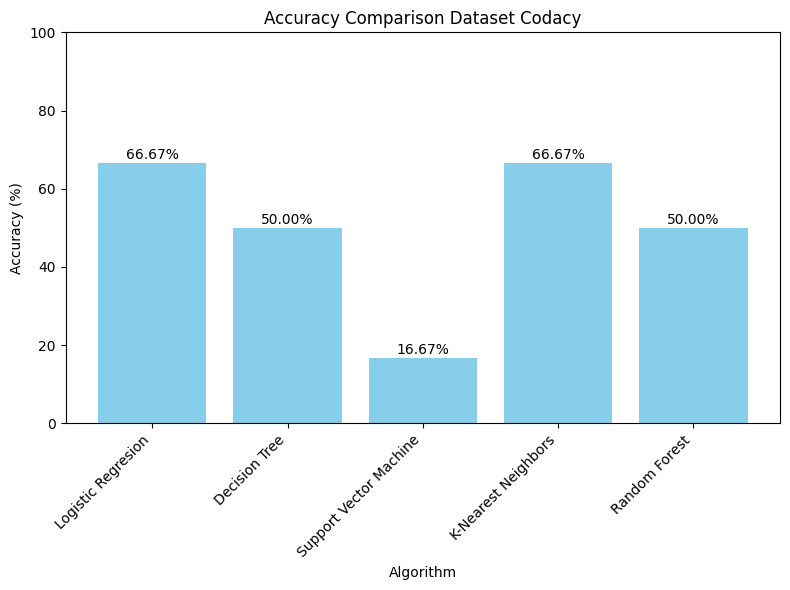

In [51]:
import matplotlib.pyplot as plt

# Ambil data dari DataFrame
algorithm = results_df['Algorithm']
accuracy = results_df['Accuracy']

# Plot
plt.figure(figsize=(8, 6))
plt.bar(algorithm, accuracy, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison Dataset Codacy')
plt.ylim(0, 100)

# Menampilkan nilai di atas tiap bar
for i in range(len(algorithm)):
    plt.text(i, accuracy[i] + 1, f'{accuracy[i]:.2f}%', ha='center')

# Menampilkan grafik
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
